In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os

In [6]:
os.getcwd()

'C:\\Users\\Zinia Gaba'

In [9]:
os.chdir('C:\\Users\Zinia Gaba\Desktop\Great Learning Data Science\Python All Files')

In [51]:
rose = pd.read_csv('Rose.csv' , parse_dates= ['YearMonth'] , index_col = 'YearMonth')

In [30]:
rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [31]:
sparkling = pd.read_csv('Sparkling.csv' , parse_dates= ['YearMonth'] , index_col = 'YearMonth' )

In [32]:
sparkling.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


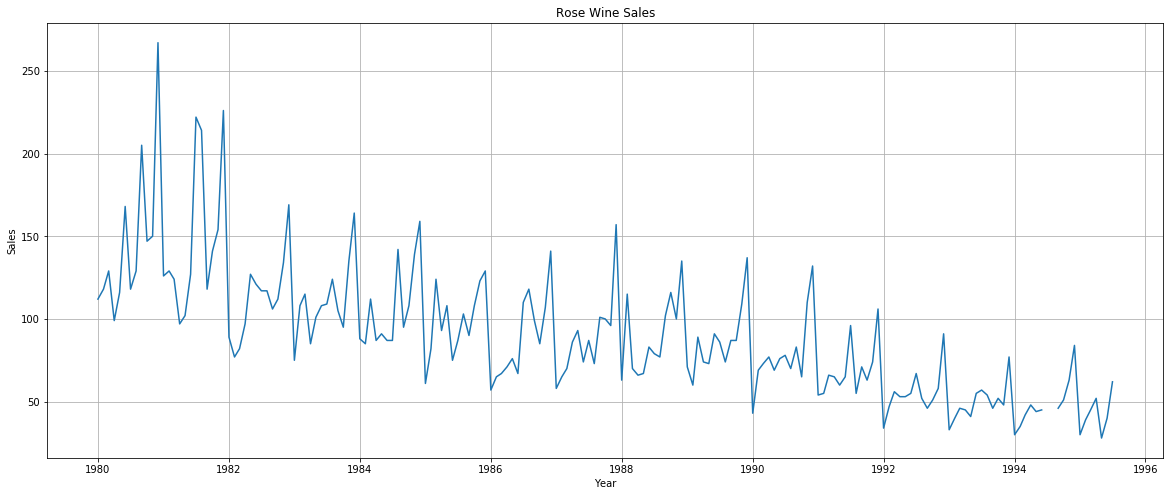

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

plt.grid();
plt.plot(rose)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Rose Wine Sales')
plt.show()


In [53]:
rose.interpolate(method = 'spline' , axis = 0, inplace = True , order = 2)

In [54]:
rose.isnull().sum()

Rose    0
dtype: int64

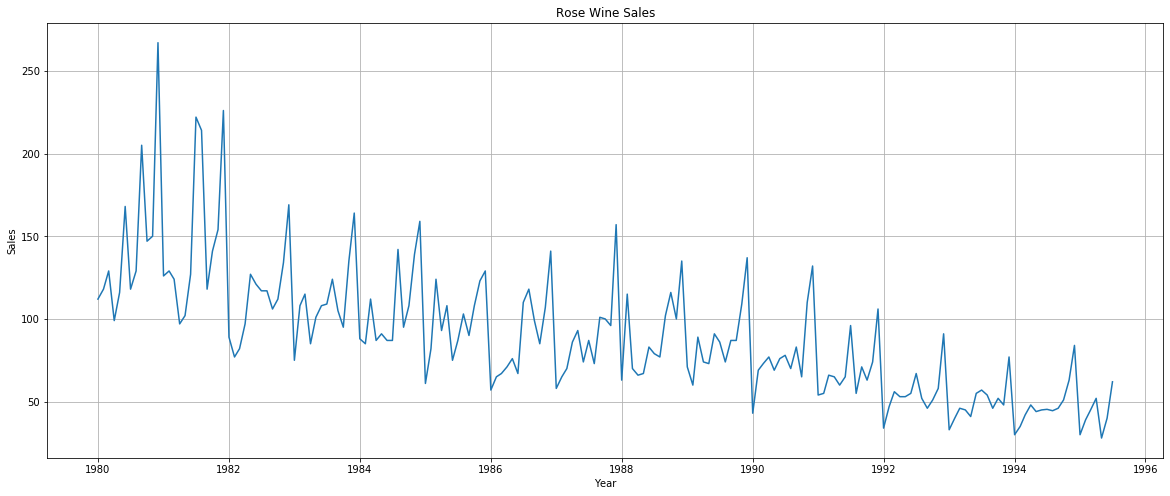

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

plt.grid();
plt.plot(rose)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Rose Wine Sales')
plt.show()


In [56]:
rose.describe()

,Rose
count,187.000000
mean,89.908354
std,39.245313
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


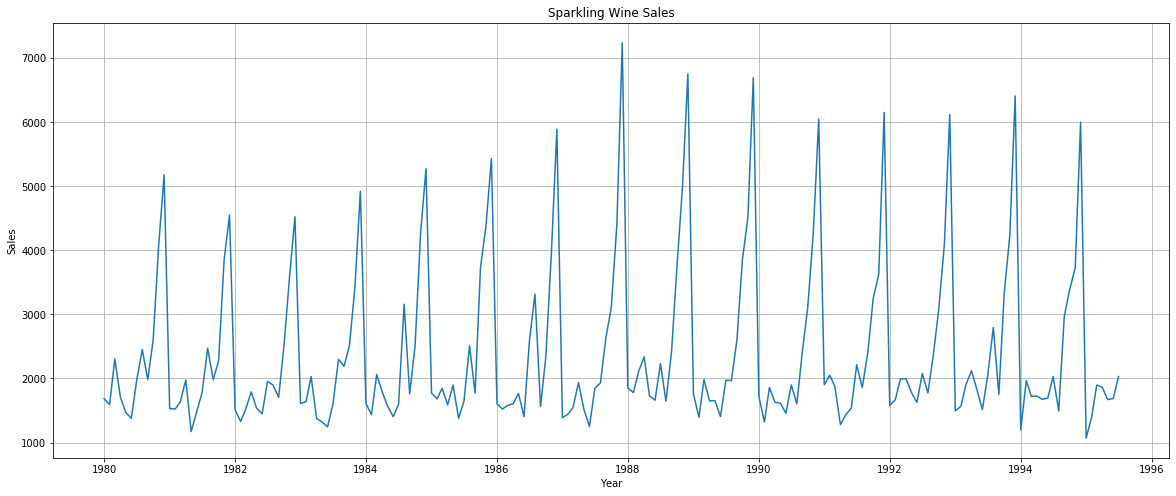

In [79]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

plt.grid();
plt.plot(sparkling)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sparkling Wine Sales')
plt.show()


In [80]:
sparkling.isnull().sum()

Sparkling    0
dtype: int64

## Yearly plot

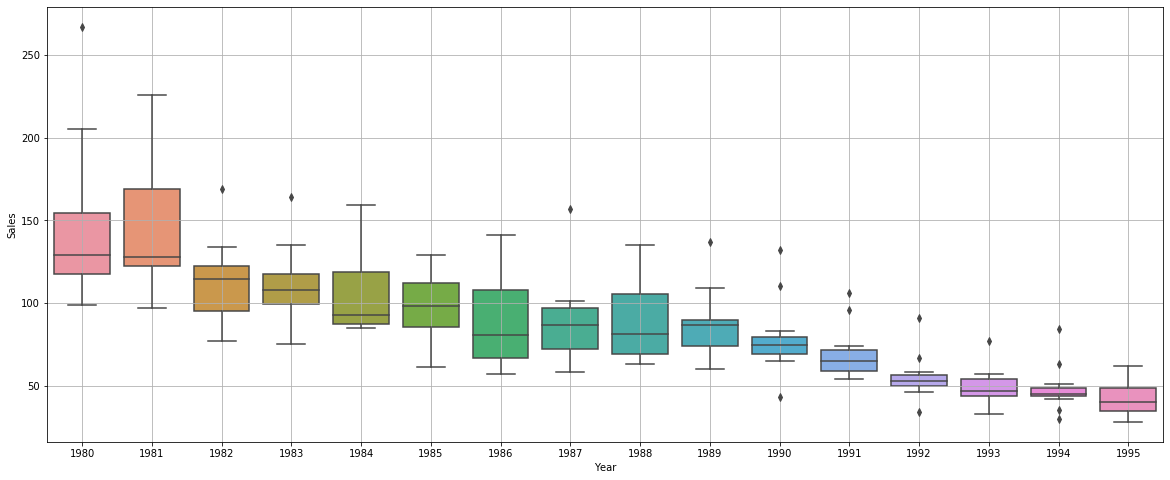

In [62]:
sns.boxplot(rose.index.year , rose['Rose'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

## Monthly plot

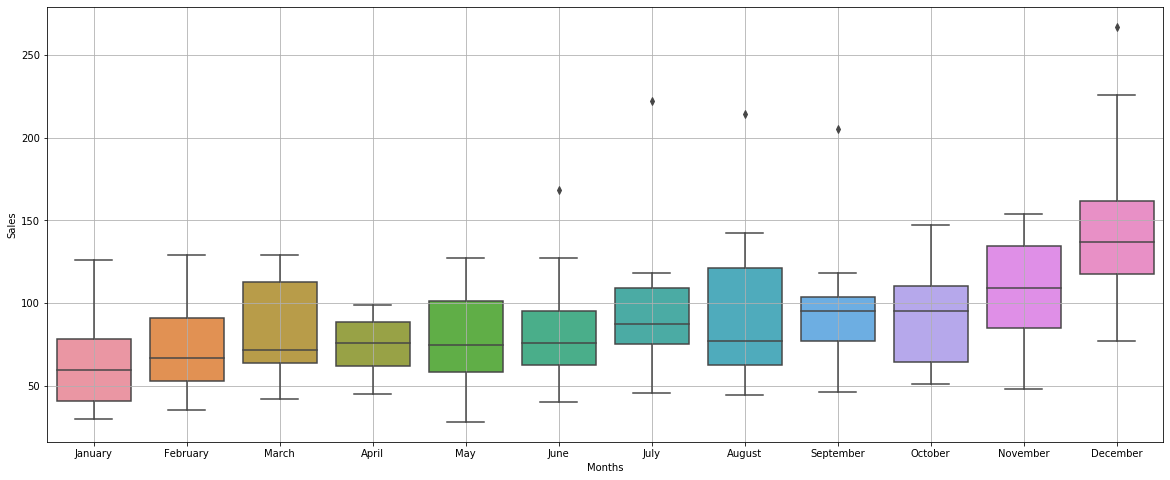

In [66]:
sns.boxplot(rose.index.month_name() , rose['Rose'])
plt.grid()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [67]:
from statsmodels.graphics.tsaplots import month_plot

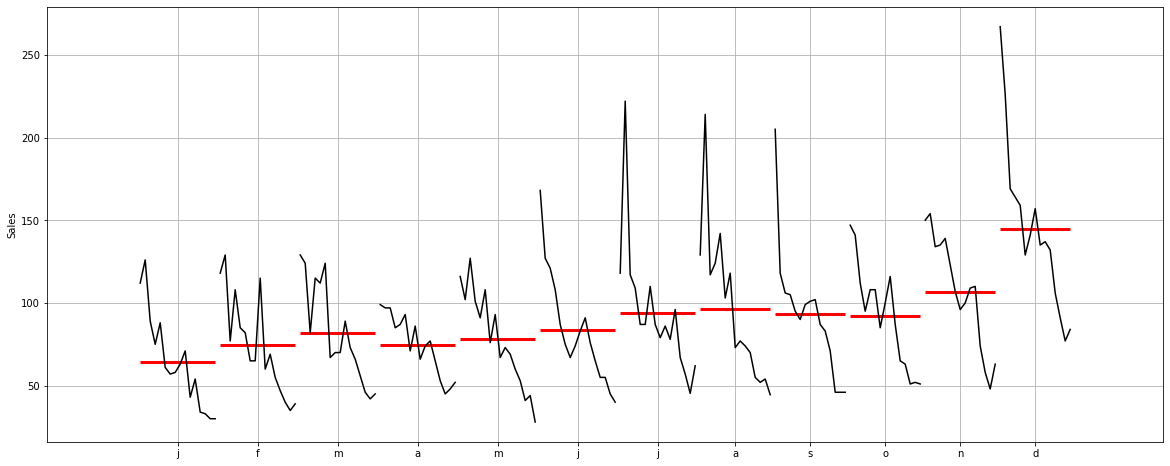

In [70]:
month_plot(rose['Rose'],ylabel='Sales')
plt.grid();

In [78]:
monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month, index = rose.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.00000,129.00000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.00000,214.00000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.00000,117.00000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.00000,124.00000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.00000,142.00000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.00000,103.00000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.00000,118.00000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.00000,73.00000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.00000,77.00000,102.0,116.0,100.0,135.0


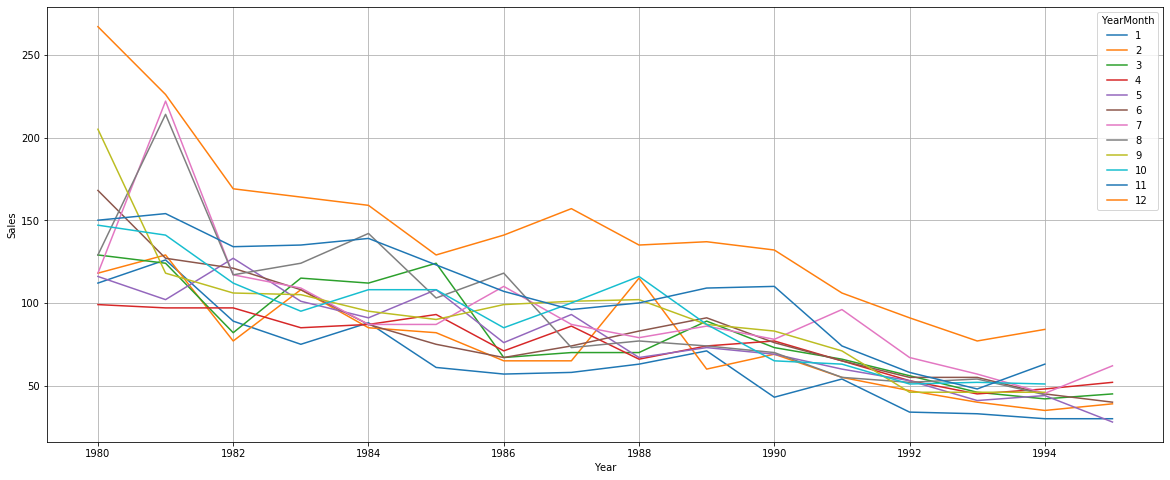

In [76]:
monthly_sales_across_years.plot()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

## Decomposition Rose

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

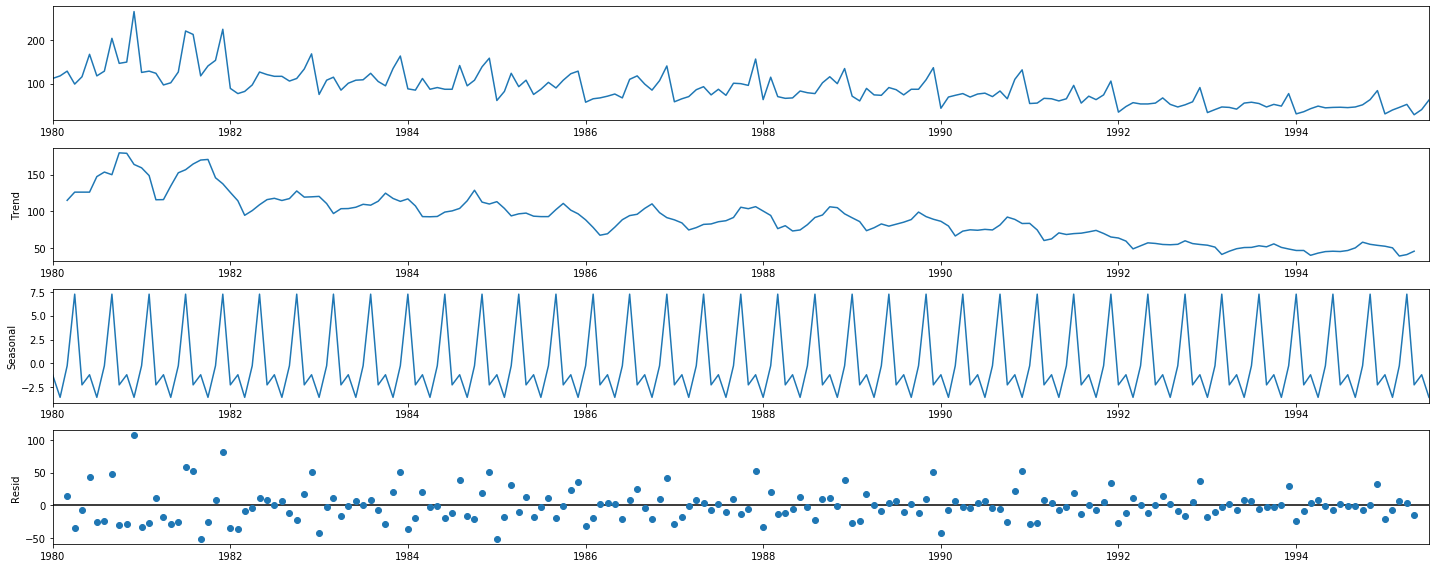

In [84]:
decomposition_a = seasonal_decompose(rose,model='additive', freq=5)
decomposition_a.plot();

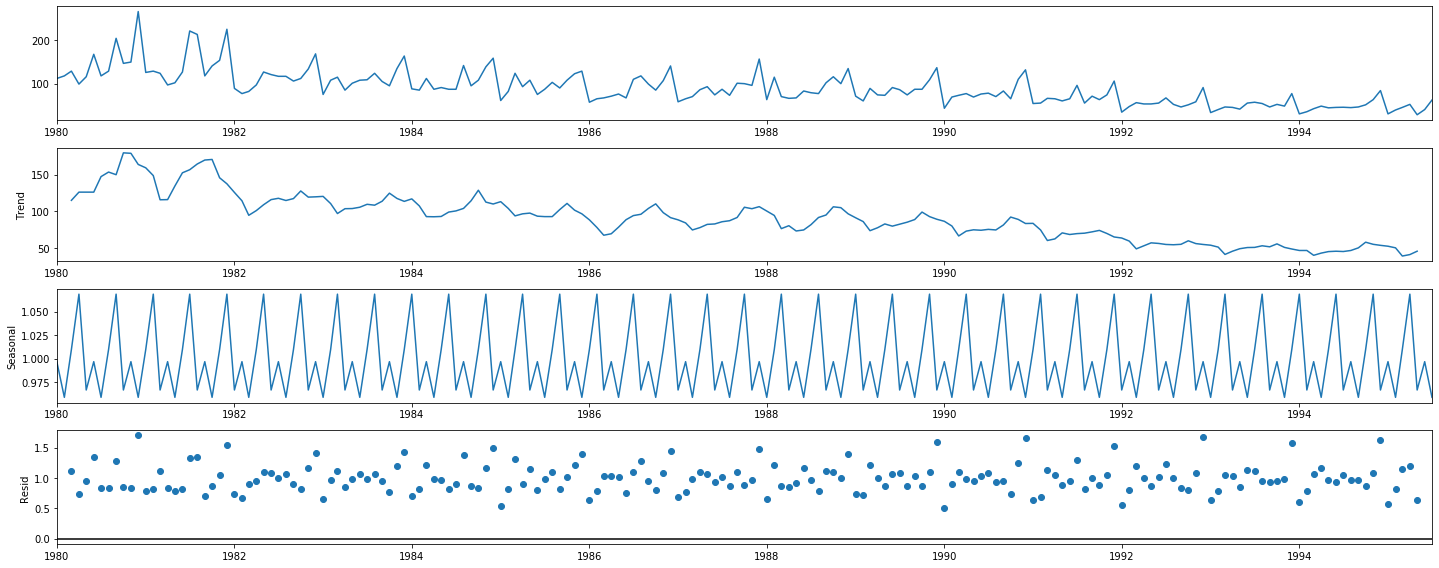

In [85]:
decomposition_m = seasonal_decompose(rose,model='multiplicative', freq=5)
decomposition_m.plot();

In [86]:
sparkling.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


## Yearly plot

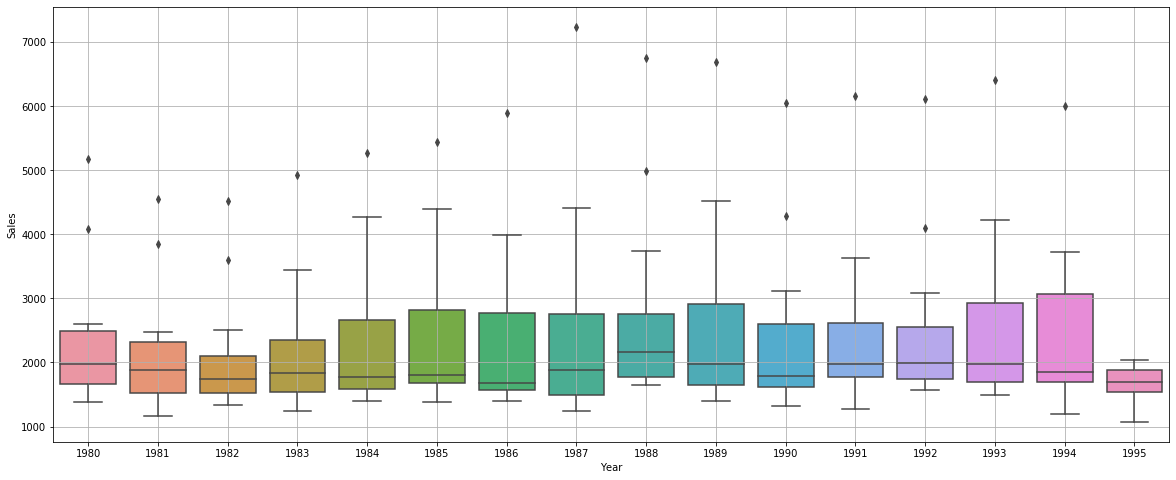

In [87]:
sns.boxplot(sparkling.index.year , sparkling['Sparkling'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

## Monthly plot

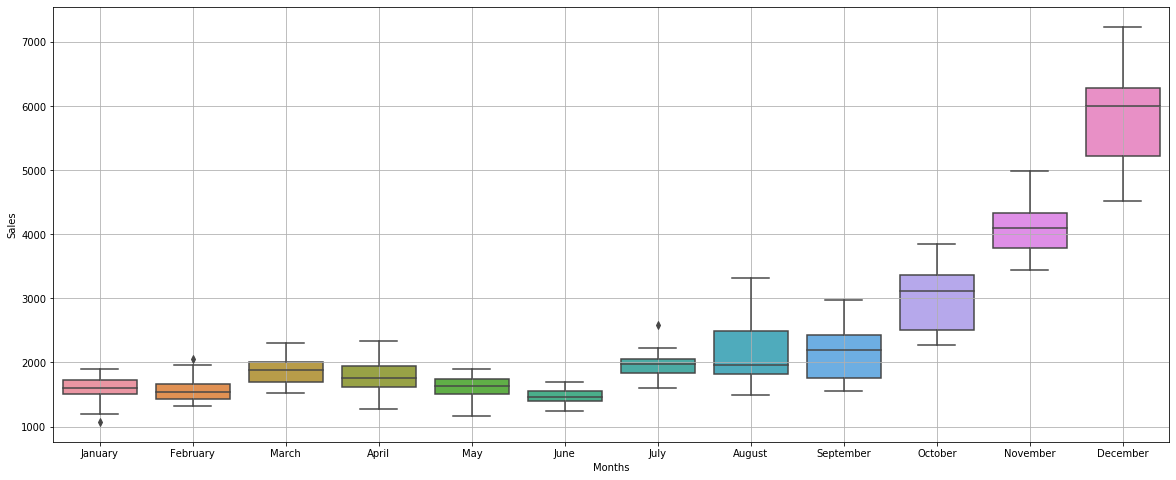

In [88]:
sns.boxplot(sparkling.index.month_name() , sparkling['Sparkling'])
plt.grid()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

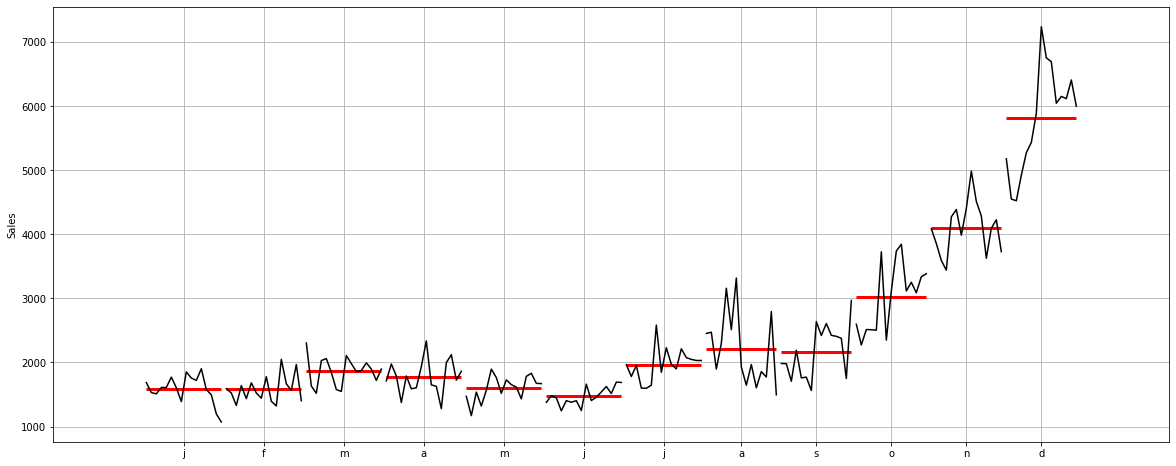

In [89]:
month_plot(sparkling['Sparkling'],ylabel='Sales')
plt.grid();

In [90]:
monthly_sales_across_years_s = pd.pivot_table(sparkling, values = 'Sparkling', columns = sparkling.index.month, index = sparkling.index.year)
monthly_sales_across_years_s

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


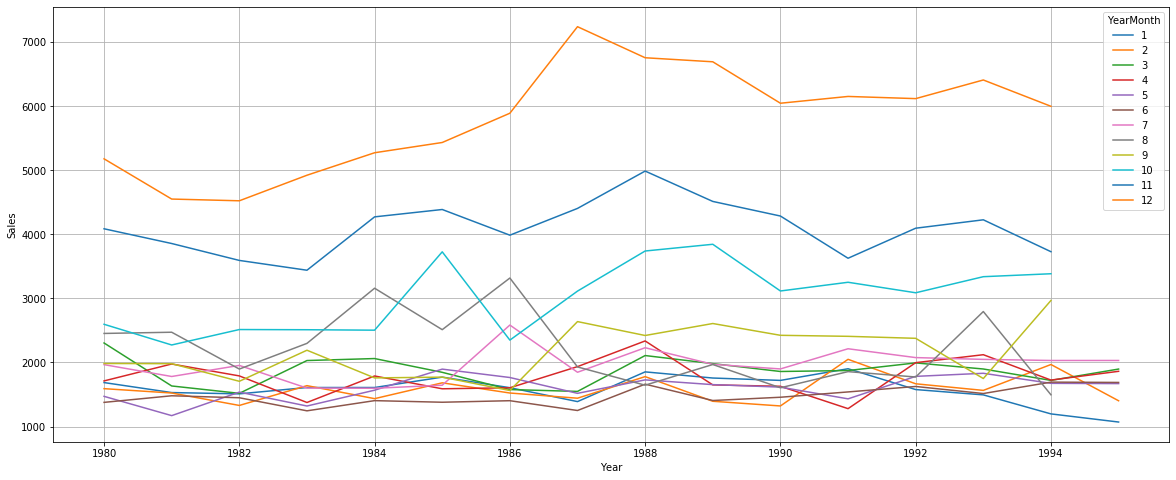

In [91]:
monthly_sales_across_years_s.plot()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

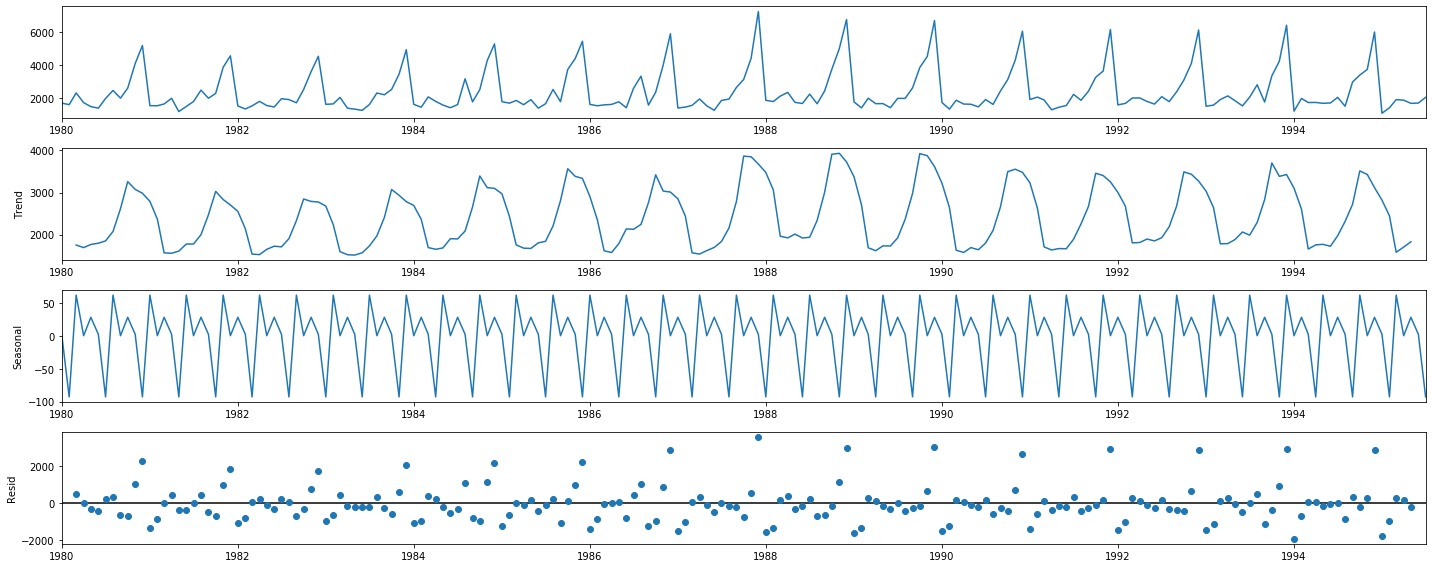

In [92]:
decomposition_b = seasonal_decompose(sparkling,model='additive', freq=5)
decomposition_b.plot();

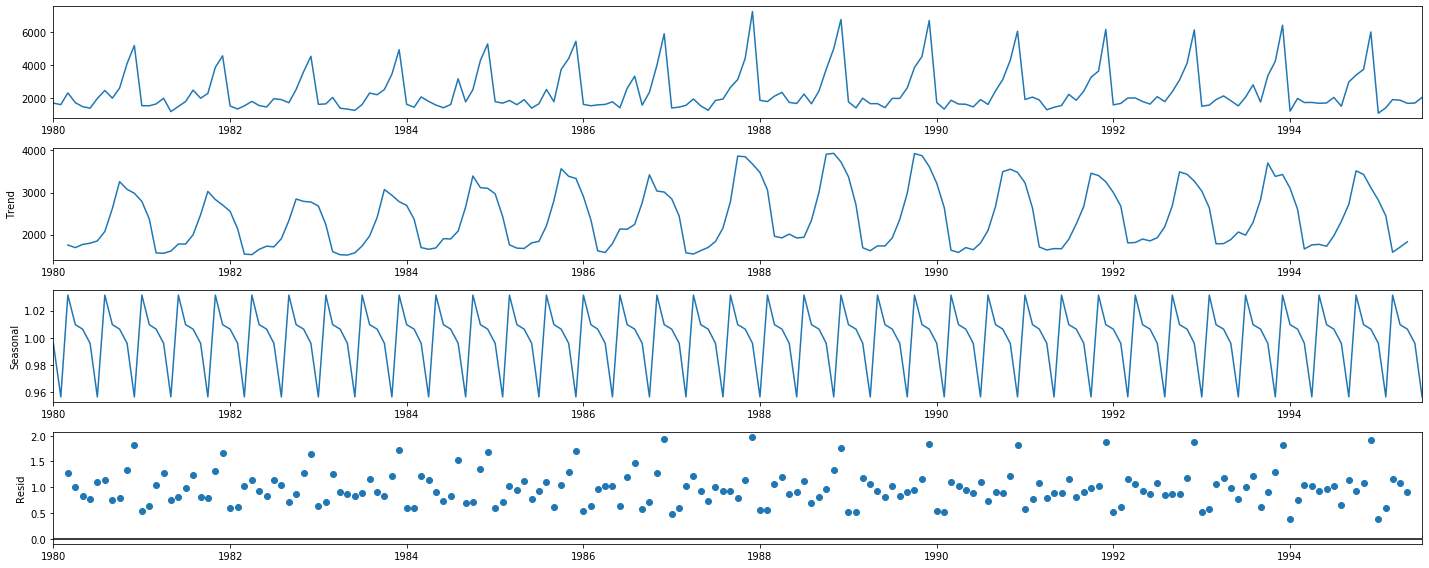

In [96]:
decomposition_n = seasonal_decompose(sparkling,model='multiplicative', freq=5)
decomposition_n.plot();

In [100]:
rose['year'] = rose.index.year

In [101]:
rose.head()

,Rose,year
YearMonth,,
1980-01-01,112.0,1980
1980-02-01,118.0,1980
1980-03-01,129.0,1980
1980-04-01,99.0,1980
1980-05-01,116.0,1980


In [104]:
rose_train=rose[rose['year'] < 1991]
rose_train.shape

(132, 2)

In [105]:
rose_train.head()

,Rose,year
YearMonth,,
1980-01-01,112.0,1980
1980-02-01,118.0,1980
1980-03-01,129.0,1980
1980-04-01,99.0,1980
1980-05-01,116.0,1980


In [113]:
rose_test=rose[rose['year'] >= 1991]
rose_test.shape

(55, 2)

In [109]:
rose.shape

(187, 2)

In [117]:
rose_train.drop('year', axis = 1 , inplace = True)

In [119]:
rose_test.drop('year', axis = 1 , inplace = True)

In [121]:
sparkling['year'] = sparkling.index.year

In [125]:
sparkling_train=sparkling[sparkling['year'] < 1991]
sparkling_train.shape

(132, 2)

In [126]:
sparkling_test=sparkling[sparkling['year'] >= 1991]
sparkling_test.shape

(55, 2)

In [127]:
sparkling.shape

(187, 2)

In [128]:
sparkling_train.drop('year', axis = 1 , inplace = True)

In [129]:
sparkling_test.drop('year', axis = 1 , inplace = True)

In [131]:
sparkling_train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


## TES Rose

In [133]:
from statsmodels.tsa.api import ExponentialSmoothing

In [724]:
model_TES_rose = ExponentialSmoothing(rose_train,trend='additive',seasonal='additive')

model_TES_rose = model_TES_rose.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(model_TES_rose.params)


Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.13348630377578782, 'smoothing_slope': 0.01378547758953572, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.38705525396102, 'initial_slope': 0.0, 'initial_seasons': array([ 38.68373526,  51.01808923,  58.99079973,  48.32588272,
        57.11739113,  62.54333192,  72.42693931,  78.50000507,
        74.47678085,  72.54335784,  90.61426088, 132.86448887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


alpha = 0.133 , beta = 0.013 , gamma = 0.0

In [143]:
# Forecasting using this model for the duration of the test set
TES_predict_rose =  model_TES_rose.forecast(len(rose_test))
TES_predict_rose

1991-01-01     44.130870
1991-02-01     56.069843
1991-03-01     63.647173
1991-04-01     52.586876
1991-05-01     60.983004
1991-06-01     66.013564
1991-07-01     75.501791
1991-08-01     81.179476
1991-09-01     76.760872
1991-10-01     74.432068
1991-11-01     92.107591
1991-12-01    133.962439
1992-01-01     39.386305
1992-02-01     51.325278
1992-03-01     58.902608
1992-04-01     47.842311
1992-05-01     56.238439
1992-06-01     61.268999
1992-07-01     70.757226
1992-08-01     76.434912
1992-09-01     72.016307
1992-10-01     69.687504
1992-11-01     87.363026
1992-12-01    129.217874
1993-01-01     34.641740
1993-02-01     46.580713
1993-03-01     54.158043
1993-04-01     43.097746
1993-05-01     51.493874
1993-06-01     56.524434
1993-07-01     66.012661
1993-08-01     71.690347
1993-09-01     67.271742
1993-10-01     64.942939
1993-11-01     82.618461
1993-12-01    124.473309
1994-01-01     29.897175
1994-02-01     41.836148
1994-03-01     49.413478
1994-04-01     38.353181


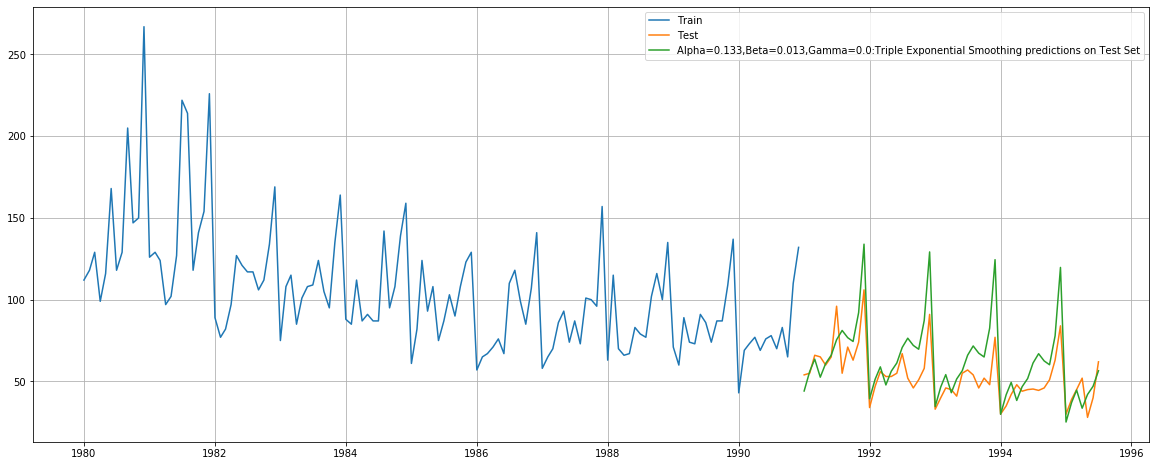

In [145]:
plt.plot(rose_train, label='Train')
plt.plot(rose_test, label='Test')

plt.plot(TES_predict, label='Alpha=0.133,Beta=0.013,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()

## DES Rose


In [147]:
from statsmodels.tsa.api import Holt

In [149]:
model_DES_rose = Holt(rose_train)

model_DES_rose = model_DES_rose.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters')
print('')
print(model_DES_rose.params)


Holt model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


alpha = 0.15 , beta = 0.15

In [151]:
DES_predict_rose = model_DES_rose.forecast(len(rose_test))
DES_predict_rose

1991-01-01     86.863579
1991-02-01     88.028056
1991-03-01     89.192534
1991-04-01     90.357011
1991-05-01     91.521488
1991-06-01     92.685966
1991-07-01     93.850443
1991-08-01     95.014921
1991-09-01     96.179398
1991-10-01     97.343876
1991-11-01     98.508353
1991-12-01     99.672831
1992-01-01    100.837308
1992-02-01    102.001785
1992-03-01    103.166263
1992-04-01    104.330740
1992-05-01    105.495218
1992-06-01    106.659695
1992-07-01    107.824173
1992-08-01    108.988650
1992-09-01    110.153127
1992-10-01    111.317605
1992-11-01    112.482082
1992-12-01    113.646560
1993-01-01    114.811037
1993-02-01    115.975515
1993-03-01    117.139992
1993-04-01    118.304469
1993-05-01    119.468947
1993-06-01    120.633424
1993-07-01    121.797902
1993-08-01    122.962379
1993-09-01    124.126857
1993-10-01    125.291334
1993-11-01    126.455811
1993-12-01    127.620289
1994-01-01    128.784766
1994-02-01    129.949244
1994-03-01    131.113721
1994-04-01    132.278199


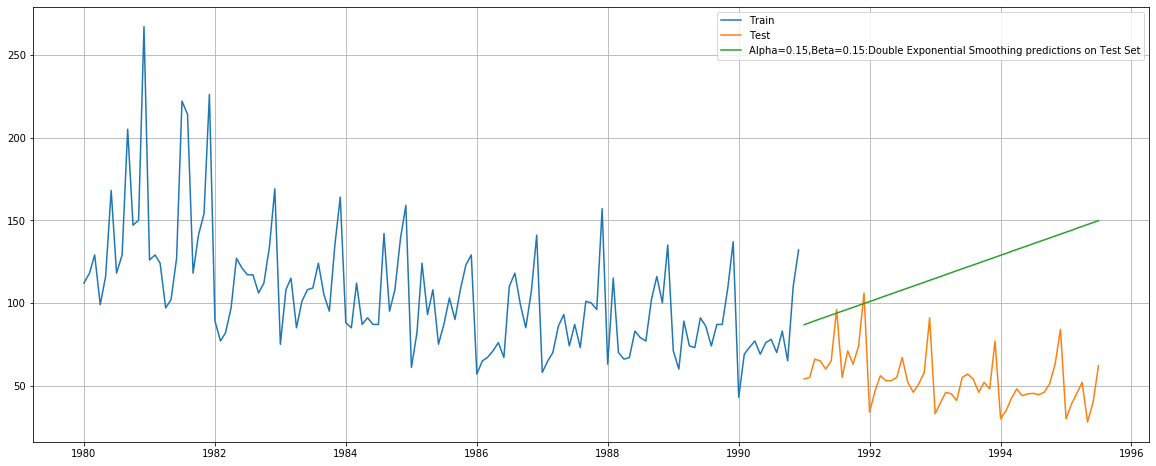

In [152]:
plt.plot(rose_train, label='Train')
plt.plot(rose_test, label='Test')

plt.plot(DES_predict_rose, label='Alpha=0.15,Beta=0.15:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()


In [154]:
from sklearn.metrics import mean_squared_error

In [155]:
print('DES RMSE Rose:',mean_squared_error(rose_test.values,DES_predict_rose.values,squared=False))

DES RMSE Rose: 70.59937747708886


In [156]:
print('TES RMSE Rose:',mean_squared_error(rose_test.values,TES_predict_rose.values,squared=False))

TES RMSE Rose: 16.47504172331957


In [157]:
results_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(rose_test.values,TES_predict_rose.values,squared=False)]}
                           ,index=['TES Additive'])

In [161]:
results_temp1 = pd.DataFrame({'Test RMSE': [mean_squared_error(rose_test.values,DES_predict_rose.values,squared=False)]}
                           ,index=['DES'])

In [165]:
results_final=pd.concat([results_temp , results_temp1])

In [166]:
results_final

,Test RMSE
TES Additive,16.475042
DES,70.599377


Next we will check the TES for multiplicative seasonality

In [168]:
model_TES_rose1 = ExponentialSmoothing(rose_train,trend='multiplicative',seasonal='additive')

model_TES_rose1 = model_TES_rose1.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(model_TES_rose1.params)


Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 7.542786523765856e-11, 'smoothing_slope': 4.894783524129949e-14, 'smoothing_seasonal': 0.2119247146768184, 'damping_slope': nan, 'initial_level': 92.65253100888367, 'initial_slope': 0.9817080196841984, 'initial_seasons': array([ 41.73152149,  46.49006903,  52.34757061,  30.54111499,
        43.85098169,  71.09793614,  83.29184153,  86.9103676 ,
        81.75331966,  70.31236674,  83.51788929, 161.90487075]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [221]:
TES_predict_rose1 =  model_TES_rose1.forecast(len(rose_test))
TES_predict_rose1

1991-01-01     49.137262
1991-02-01     63.959869
1991-03-01     69.682040
1991-04-01     62.880504
1991-05-01     66.697608
1991-06-01     72.199367
1991-07-01     79.304363
1991-08-01     79.465445
1991-09-01     83.644919
1991-10-01     80.847004
1991-11-01     99.720033
1991-12-01    138.053020
1992-01-01     47.556979
1992-02-01     62.408493
1992-03-01     68.159042
1992-04-01     61.385364
1992-05-01     65.229818
1992-06-01     70.758425
1992-07-01     77.889779
1992-08-01     78.076736
1992-09-01     82.281612
1992-10-01     79.508635
1992-11-01     98.406145
1992-12-01    136.763167
1993-01-01     46.290719
1993-02-01     61.165396
1993-03-01     66.938683
1993-04-01     60.187328
1993-05-01     64.053696
1993-06-01     69.603817
1993-07-01     76.756291
1993-08-01     76.963982
1993-09-01     81.189213
1993-10-01     78.436218
1993-11-01     97.353344
1993-12-01    135.729624
1994-01-01     45.276082
1994-02-01     60.169318
1994-03-01     65.960826
1994-04-01     59.227358


In [172]:
results_temp2 = mean_squared_error(rose_test.values,TES_predict_rose1.values,squared=False)

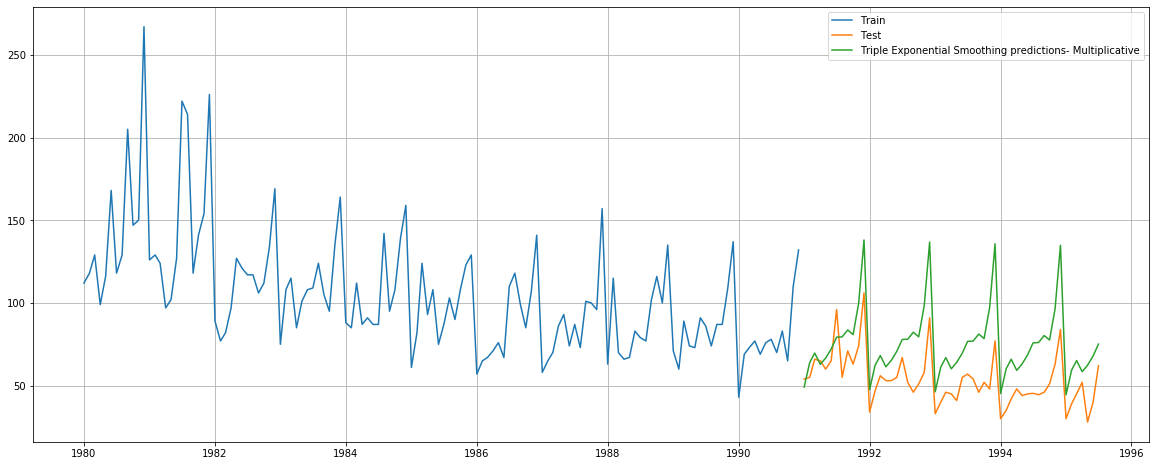

In [185]:
plt.plot(rose_train, label='Train')
plt.plot(rose_test, label='Test')

plt.plot(TES_predict_rose1, label= 'Triple Exponential Smoothing predictions- Multiplicative')

plt.legend(loc='best')
plt.grid()

In [177]:
results_temp2 = pd.DataFrame({'Test RMSE': [mean_squared_error(rose_test.values,TES_predict_rose1.values,squared=False)]}
                           ,index=['TES Multiplicative'])

In [178]:
results_final= pd.concat([results_final, results_temp2])

In [183]:
results_final.sort_values(by = 'Test RMSE', ascending = True)

,Test RMSE
TES Additive,16.475042
TES Multiplicative,25.210414
DES,70.599377


In [186]:
from sklearn.linear_model import LinearRegression

In [195]:
rose_train_time = [i+1 for i in range(len(rose_train))]

In [197]:
rose_test_time = [i+ 132 for i in range(len(rose_test))]

In [199]:
lr_rose_train = rose_train.copy()

In [200]:
lr_rose_test = rose_test.copy()

In [201]:
lr_rose_train['time'] = rose_train_time

In [202]:
lr_rose_test['time'] = rose_test_time

In [207]:
lr_rose = LinearRegression()

In [215]:
lr_rose_train.head()

,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


In [216]:
lr_rose.fit(lr_rose_train[['Rose']] , lr_rose_train[['time']])

LinearRegression()

In [217]:
lr_predict_rose = lr_rose.predict(lr_rose_test[['time']])

In [726]:
lr_predict_rose=pd.DataFrame(lr_predict_rose, rose_test.index)
lr_predict_rose.head()

,0
YearMonth,
1991-01-01,51.540825
1991-02-01,50.988023
1991-03-01,50.435220
1991-04-01,49.882417
1991-05-01,49.329615


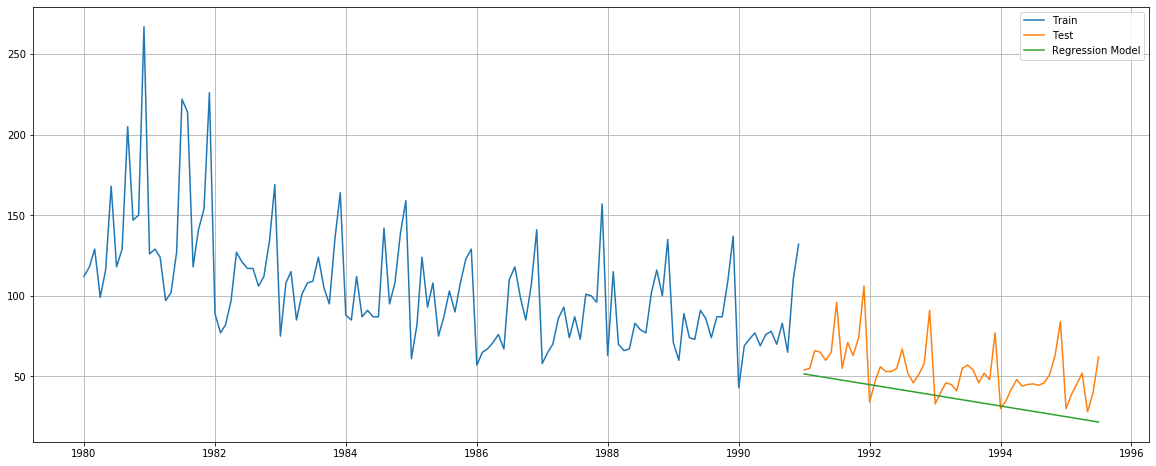

In [233]:
plt.plot(rose_train, label='Train')
plt.plot(rose_test, label='Test')

plt.plot(lr_predict_rose, label= 'Regression Model')

plt.legend(loc='best')
plt.grid()

In [243]:
results_lr = pd.DataFrame ({'Test RMSE' : [mean_squared_error(lr_predict_rose,rose_test , squared= False )]} , index = ['Regression'])

In [244]:
results_lr

,Test RMSE
Regression,22.573067


In [247]:
results_final = pd.concat([results_final , results_lr])

In [249]:
results_final.sort_values(by = 'Test RMSE' , ascending= True)

,Test RMSE
TES Additive,16.475042
Regression,22.573067
TES Multiplicative,25.210414
DES,70.599377


## Naive Model

In [267]:
naive_value_rose=rose_train.iloc[len(rose_train)-1]

In [285]:
naive_value_rose[0]

132.0

In [278]:
naive_predict_rose = pd.DataFrame(index =rose_test.index)

In [286]:
naive_predict_rose['Rose'] = naive_value_rose[0]

In [288]:
naive_predict_rose.head()

,Rose
YearMonth,
1991-01-01,132.0
1991-02-01,132.0
1991-03-01,132.0
1991-04-01,132.0
1991-05-01,132.0


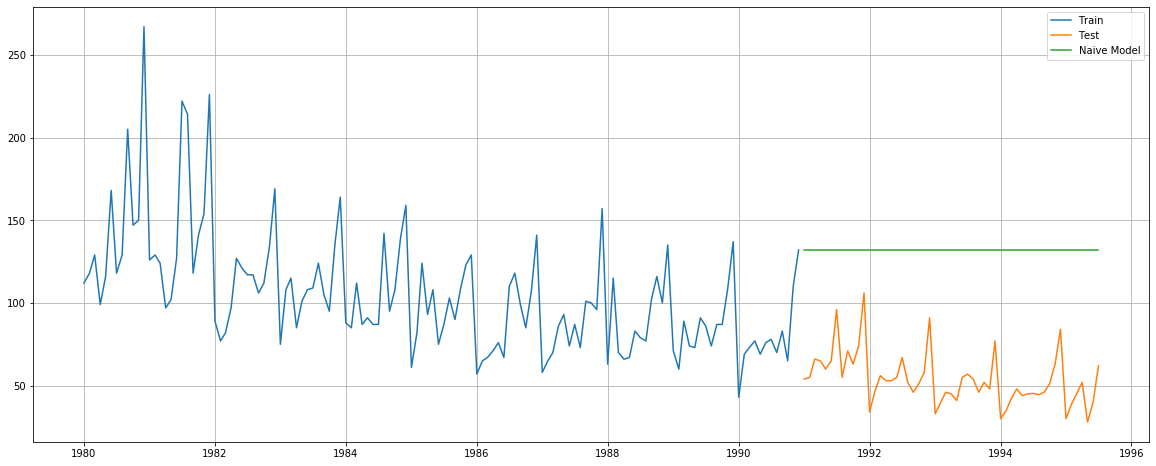

In [289]:
plt.plot(rose_train, label='Train')
plt.plot(rose_test, label='Test')

plt.plot(naive_predict_rose, label= 'Naive Model')

plt.legend(loc='best')
plt.grid()

In [292]:
results_temp4 = pd.DataFrame( {'Test RMSE' : [mean_squared_error(naive_predict_rose , rose_test , squared = False)]} , index = ['Naive Model'])

In [294]:
results_final = pd.concat( [results_final , results_temp4])

In [295]:
results_final

,Test RMSE
TES Additive,16.475042
DES,70.599377
TES Multiplicative,25.210414
Regression,22.573067
Naive Model,79.741326


## Simple average

In [305]:
sa_predict_rose=pd.DataFrame(index = rose_test.index)

In [306]:
sa_predict_rose['rose'] = rose_train.mean()[0]

In [308]:
sa_predict_rose.head()

,rose
YearMonth,
1991-01-01,104.939394
1991-02-01,104.939394
1991-03-01,104.939394
1991-04-01,104.939394
1991-05-01,104.939394


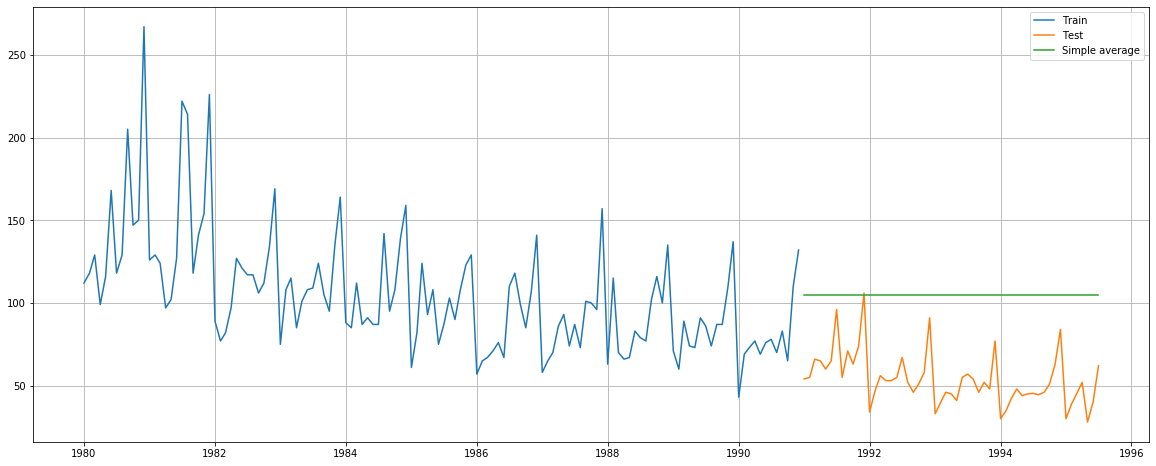

In [309]:
plt.plot(rose_train, label='Train')
plt.plot(rose_test, label='Test')

plt.plot(sa_predict_rose, label= 'Simple average')

plt.legend(loc='best')
plt.grid()

In [310]:
results_temp5 = pd.DataFrame( {'Test RMSE' : [mean_squared_error(sa_predict_rose , rose_test , squared = False)]} , index = ['Simple Average Model'])

In [312]:
results_final = pd.concat([results_final , results_temp5 ])

In [313]:
results_final

,Test RMSE
TES Additive,16.475042
DES,70.599377
TES Multiplicative,25.210414
Regression,22.573067
Naive Model,79.741326
Simple Average Model,53.483727


In [330]:
MovingAverage_rose = rose.copy()
MovingAverage_rose.head()

,Rose,year
YearMonth,,
1980-01-01,112.0,1980
1980-02-01,118.0,1980
1980-03-01,129.0,1980
1980-04-01,99.0,1980
1980-05-01,116.0,1980


In [331]:
MovingAverage_rose['Trailing_2'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_9'] = MovingAverage_rose['Rose'].rolling(9).mean()

MovingAverage_rose.head()

,Rose,year,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,
1980-01-01,112.0,1980,NaN,NaN,NaN,NaN
1980-02-01,118.0,1980,115.0,NaN,NaN,NaN
1980-03-01,129.0,1980,123.5,NaN,NaN,NaN
1980-04-01,99.0,1980,114.0,114.5,NaN,NaN
1980-05-01,116.0,1980,107.5,115.5,NaN,NaN


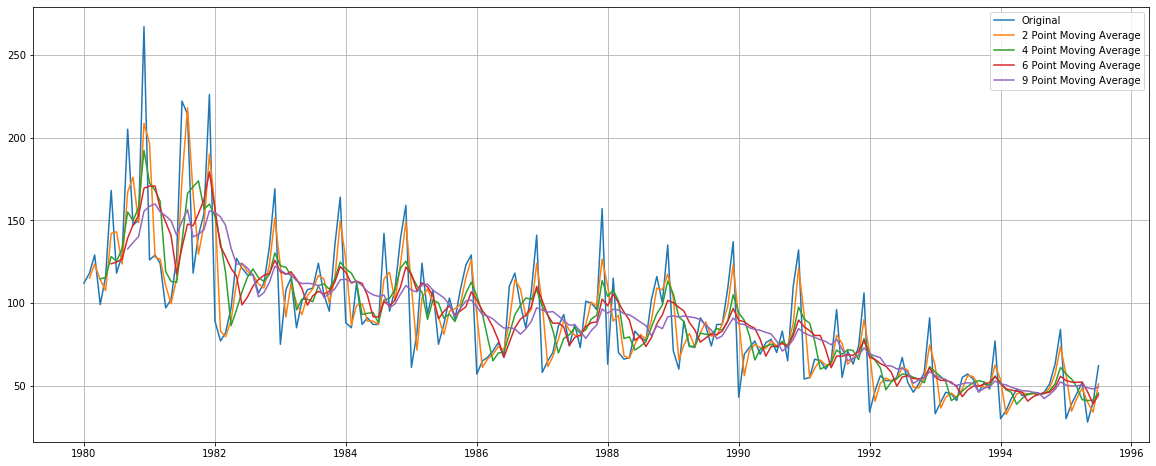

In [370]:


plt.plot(MovingAverage_rose['Rose'], label='Original')
plt.plot(MovingAverage_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [335]:
MovingAverage_train_rose = MovingAverage_rose[MovingAverage_rose['year']< 1991]
MovingAverage_train_rose.head()

,Rose,year,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,
1980-01-01,112.0,1980,NaN,NaN,NaN,NaN
1980-02-01,118.0,1980,115.0,NaN,NaN,NaN
1980-03-01,129.0,1980,123.5,NaN,NaN,NaN
1980-04-01,99.0,1980,114.0,114.5,NaN,NaN
1980-05-01,116.0,1980,107.5,115.5,NaN,NaN


In [336]:
MovingAverage_test_rose = MovingAverage_rose[MovingAverage_rose['year']>= 1991]
MovingAverage_test_rose.head()

,Rose,year,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,
1991-01-01,54.0,1991,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,1991,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,1991,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,1991,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,1991,62.5,61.50,72.000000,76.666667


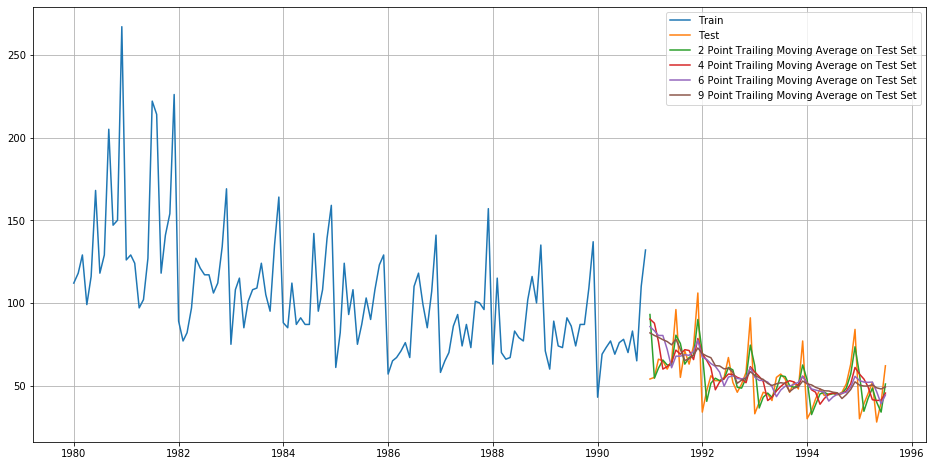

In [338]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train_rose['Rose'], label='Train')
plt.plot(MovingAverage_test_rose['Rose'], label='Test')


plt.plot(MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test_rose['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [372]:
rmse_model4_test_2 = mean_squared_error(rose_test['Rose'],MovingAverage_test_rose['Trailing_2'],squared=False)
print("Moving Average Model forecast on the Training Data - RMSE %3.3f" %(rmse_model4_test_2))



rmse_model4_test_4 = mean_squared_error(rose_test['Rose'],MovingAverage_test_rose['Trailing_4'],squared=False)
print("Moving Average Model forecast on the Training Data - RMSE %3.3f" %(rmse_model4_test_4))



rmse_model4_test_6 = mean_squared_error(rose_test['Rose'],MovingAverage_test_rose['Trailing_6'],squared=False)
print("Moving Average Model forecast on the Training Data - RMSE %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = mean_squared_error(rose_test['Rose'],MovingAverage_test_rose['Trailing_9'],squared=False)
print("Moving Average Model forecast on the Training Data - RMSE %3.3f" %(rmse_model4_test_9))

Moving Average Model forecast on the Training Data - RMSE 11.530
Moving Average Model forecast on the Training Data - RMSE 14.457
Moving Average Model forecast on the Training Data - RMSE 14.572
Moving Average Model forecast on the Training Data - RMSE 14.732


In [354]:
Results_moving2 = pd.DataFrame(  {'Test RMSE' : [ rmse_model4_test_2]} , index= ['2 point Moving Average'])

In [351]:
Results_moving4= pd.DataFrame(  {'Test RMSE' : [ rmse_model4_test_4]} , index= ['4 point Moving Average'])

In [352]:
Results_moving6= pd.DataFrame(  {'Test RMSE' : [ rmse_model4_test_6]} , index= ['6 point Moving Average'])

In [353]:
Results_moving9= pd.DataFrame(  {'Test RMSE' : [ rmse_model4_test_9]} , index= ['9 point Moving Average'])

In [367]:
results_final_rose = pd.concat( [results_final , Results_moving2, Results_moving4, Results_moving6 , Results_moving9])

In [374]:
results_final_rose.sort_values(by = 'Test RMSE' ,ascending= True)

,Test RMSE
2 point Moving Average,11.529811
4 point Moving Average,14.457115
6 point Moving Average,14.571789
9 point Moving Average,14.731914
TES Additive,16.475042
Regression,22.573067
TES Multiplicative,25.210414
Simple Average Model,53.483727
DES,70.599377
Naive Model,79.741326


## Checking if the series is stationary

In [377]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    rolmean = timeseries.rolling(window=7).mean() 
    rolstd = timeseries.rolling(window=7).std()   

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

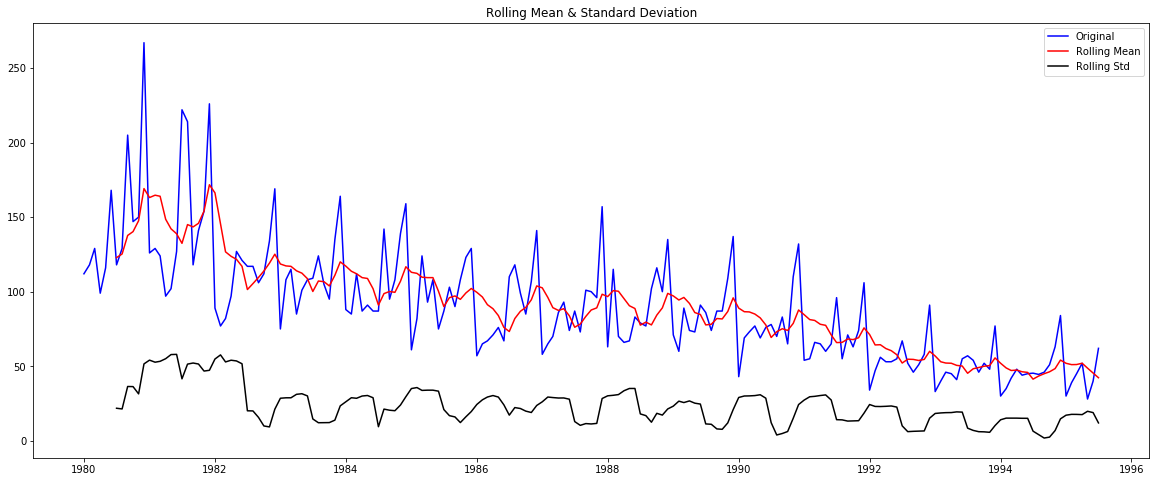

Results of Dickey-Fuller Test:
Test Statistic                  -1.873307
p-value                          0.344721
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [378]:
test_stationarity(rose['Rose'])

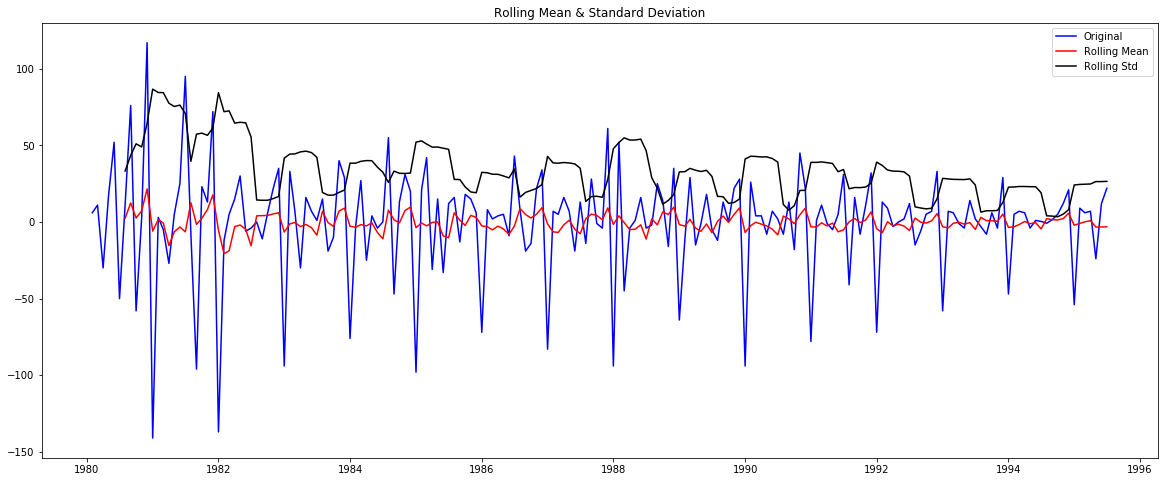

Results of Dickey-Fuller Test:
Test Statistic                -8.044136e+00
p-value                        1.813615e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [379]:
test_stationarity(rose['Rose'].diff().dropna())

In [730]:
import itertools
p = q = range(0, 3)
d= range(0,2)
pdq_rose = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 1)(0, 0, 2, 12)
Model: (0, 1, 2)(0, 1, 0, 12)
Model: (0, 1, 2)(0, 1, 1, 12)


In [498]:
dfObj_rose = pd.DataFrame(columns=['param', 'AIC'])
dfObj_rose

,param,AIC


In [540]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq_rose:
            try:
                mod = ARIMA(rose_train['Rose'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_rose = dfObj_rose.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.468405768463
ARIMA(0, 0, 2) - AIC:1306.5866794770147
ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353724115532
ARIMA(1, 0, 0) - AIC:1301.5463044353112
ARIMA(1, 0, 1) - AIC:1294.510585181699
ARIMA(1, 0, 2) - AIC:1292.0532102439645
ARIMA(1, 1, 0) - AIC:1319.3483105803125
ARIMA(1, 1, 1) - AIC:1277.7757488779507
ARIMA(1, 1, 2) - AIC:1277.3592330926072
ARIMA(2, 0, 0) - AIC:1302.3460741768874
ARIMA(2, 0, 1) - AIC:1292.9371945613286
ARIMA(2, 0, 2) - AIC:1292.2480553293067
ARIMA(2, 1, 0) - AIC:1300.609261174427
ARIMA(2, 1, 1) - AIC:1279.045689409309
ARIMA(2, 1, 2) - AIC:1279.2986939365255


In [589]:
dfObj_rose.sort_values( by = 'AIC', ascending= True).head()

,param,AIC
5,"(0, 1, 2)",1276.835372
11,"(1, 1, 2)",1277.359233
10,"(1, 1, 1)",1277.775749
16,"(2, 1, 1)",1279.045689
17,"(2, 1, 2)",1279.298694


p,d and q as 0,1 and 2 respectively gives the lowest AIC.

In [482]:
mod = ARIMA(rose_train['Rose'], order=(0,1,2))

results_Arima_rose = mod.fit()

print(results_Arima_rose.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Wed, 27 Jan 2021   AIC                           1276.835
Time:                        01:18:35   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [499]:
arima_test_rose =rose_test.copy()
pred_ARIMA = results_Arima_rose.forecast(steps=len(arima_test_rose))
pred_ARIMA[0]

array([83.95189958, 71.47833759, 70.98979968, 70.50126176, 70.01272385,
       69.52418594, 69.03564802, 68.54711011, 68.0585722 , 67.57003428,
       67.08149637, 66.59295846, 66.10442055, 65.61588263, 65.12734472,
       64.63880681, 64.15026889, 63.66173098, 63.17319307, 62.68465516,
       62.19611724, 61.70757933, 61.21904142, 60.7305035 , 60.24196559,
       59.75342768, 59.26488977, 58.77635185, 58.28781394, 57.79927603,
       57.31073811, 56.8222002 , 56.33366229, 55.84512437, 55.35658646,
       54.86804855, 54.37951064, 53.89097272, 53.40243481, 52.9138969 ,
       52.42535898, 51.93682107, 51.44828316, 50.95974525, 50.47120733,
       49.98266942, 49.49413151, 49.00559359, 48.51705568, 48.02851777,
       47.53997986, 47.05144194, 46.56290403, 46.07436612, 45.5858282 ])

In [500]:
results_f1=pd.DataFrame( { 'Test RMSE' : [mean_squared_error(pred_ARIMA[0], rose_test, squared= False)] } , index= ['ARIMA( 0,1,2)'])

In [501]:
results_f1

,Test RMSE
"ARIMA( 0,1,2)",15.625788


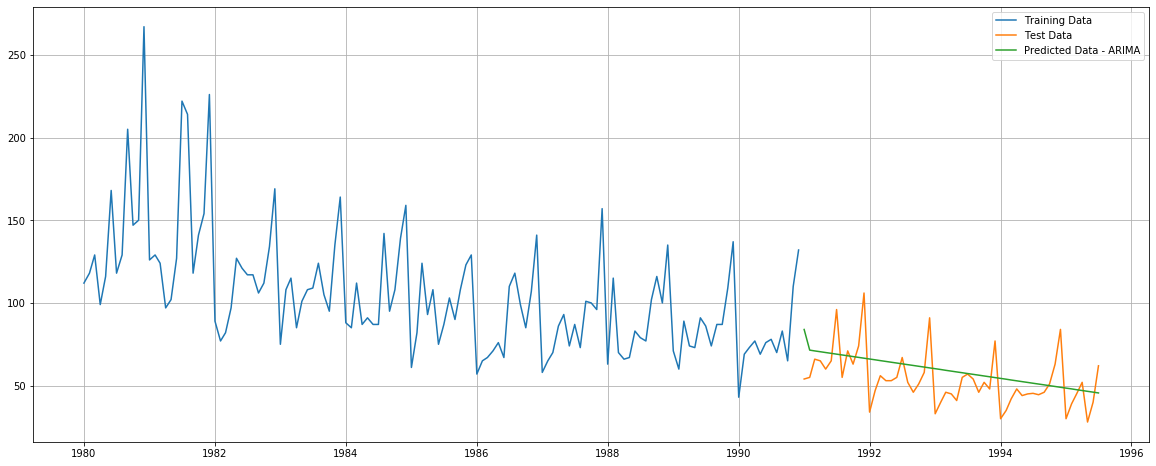

In [444]:
plt.plot(rose_train,label='Training Data')
plt.plot(rose_test,label='Test Data')
plt.plot(rose_test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

But as seasonality is present in our time series, we should be using SARIMA

In [445]:
dfObj2_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2_rose

,param,seasonal,AIC


In [541]:
import statsmodels.api as sm
for param in pdq_rose:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(rose_train['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2_rose = dfObj2_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1342.8879796320243
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1127.6939671247937
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1132.3491004641107
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:973.2839647242731
SARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:819.263258315186
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1123.327544387293
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1072.6552135799577
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:947.5166315956768
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:982.5608243528003
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:970.9074505848823
SARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:821.1204806447909
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:939.9681316162018
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:941.4830987726748
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:931.526865994022
SARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:828.5116218528786
SARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:822.8736935508155
SARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:814.916

SARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:973.0250803592586
SARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1105.293649448867
SARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:909.4621534969745
SARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:787.0708545249862
SARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1087.0915036702095
SARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1054.8823464791806
SARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:915.1883595100368
SARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:934.42429869993
SARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:919.5722547209538
SARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:788.3877540304203
SARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:914.6874397121487
SARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:932.0304670068224
SARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:900.2595949045349
SARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:809.1023799335043
SARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:808.5333666205419
SARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:781.0077113765934
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1135.29554

SARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:794.2799626277613
SARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1071.424960110127
SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1052.9244471207892
SARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:916.2424912822602
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:926.3197036268118
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:928.3197020908606
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:796.1300001391968
SARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:896.5181608039705
SARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:897.6399565369395
SARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:899.4835866283662
SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:792.8940753934057
SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:784.8928053201853
SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:785.8335673020377
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:1253.9102116146687
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:916.3258311107577
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1099.4823964819768
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:904.700

In [542]:
dfObj2_rose.sort_values( by = 'AIC' , ascending= True)

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 1, 2, 12)",774.969120
107,"(0, 1, 2)","(2, 1, 2, 12)",774.969120
269,"(0, 1, 2)","(2, 1, 2, 12)",774.969120
53,"(1, 1, 2)","(2, 1, 2, 12)",776.940110
377,"(1, 1, 2)","(2, 1, 2, 12)",776.940110
...,...,...,...
270,"(1, 0, 0)","(0, 0, 0, 12)",1331.248484
163,"(0, 0, 0)","(0, 0, 1, 12)",1342.887980
198,"(0, 0, 2)","(0, 0, 0, 12)",1426.844550
180,"(0, 0, 1)","(0, 0, 0, 12)",1481.819865


SARIMA(0, 1, 2)x(2, 1, 2, 12)12 gives the lowest AIC

In [581]:
mod_rose = sm.tsa.statespace.SARIMAX(rose_train['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_s_rose = mod_rose.fit()
print(results_s_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Wed, 27 Jan 2021   AIC                            774.969
Time:                                    14:17:17   BIC                            792.622
Sample:                                01-01-1980   HQIC                           782.094
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.168      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

In [593]:
mod_rose_T = sm.tsa.statespace.SARIMAX(rose_train['Rose'],
                                order=(0,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_s_rose_T = mod_rose_T.fit()
print(results_s_rose_T.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -454.537
Date:                            Wed, 27 Jan 2021   AIC                            915.073
Time:                                    14:53:05   BIC                            923.035
Sample:                                01-01-1980   HQIC                           918.299
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8930      0.047    -18.881      0.000      -0.986      -0.800
ma.S.L12      -0.6052      0.076   

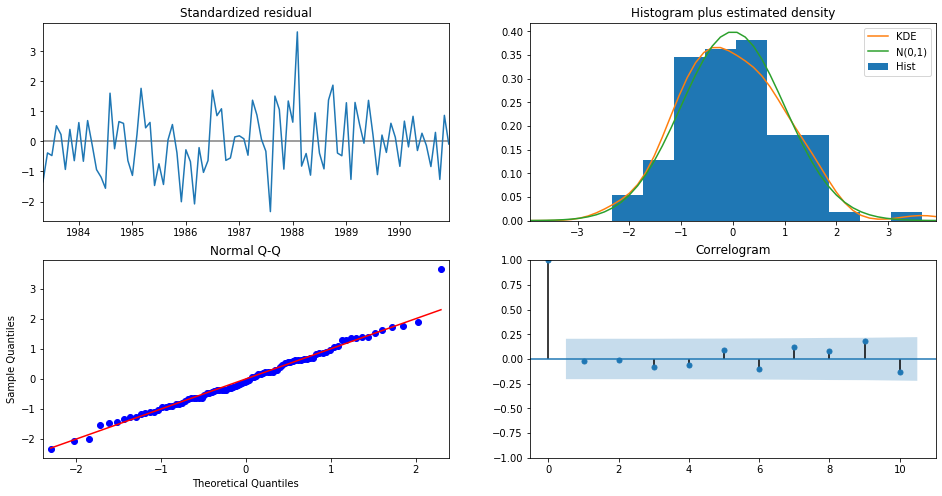

In [582]:
results_s_rose.plot_diagnostics(figsize=(16, 8))
plt.show()

In [583]:
pred_SARIMA = results_s_rose.get_forecast(steps=len(rose_test))
pred_SARIMA.predicted_mean.head()

1991-01-01    44.214382
1991-02-01    62.327059
1991-03-01    67.313673
1991-04-01    63.161000
1991-05-01    66.474759
Freq: MS, dtype: float64

In [584]:
results_f2=pd.DataFrame( { 'Test RMSE' : [mean_squared_error(pred_SARIMA.predicted_mean, rose_test, squared= False)] } , index= ['SARIMA (0, 1, 2)x(2, 1, 2, 12) '])

In [585]:
results_f2

,Test RMSE
"SARIMA (0, 1, 2)x(2, 1, 2, 12)",16.523415


In [586]:
results_final_rose

,Test RMSE
"ARIMA (4, 1, 2)ACF, PACF",33.972477
TES Additive,16.475042
DES,70.599377
TES Multiplicative,25.210414
Regression,22.573067
Naive Model,79.741326
Simple Average Model,53.483727
2 point Moving Average,11.529811
4 point Moving Average,14.457115
6 point Moving Average,14.571789


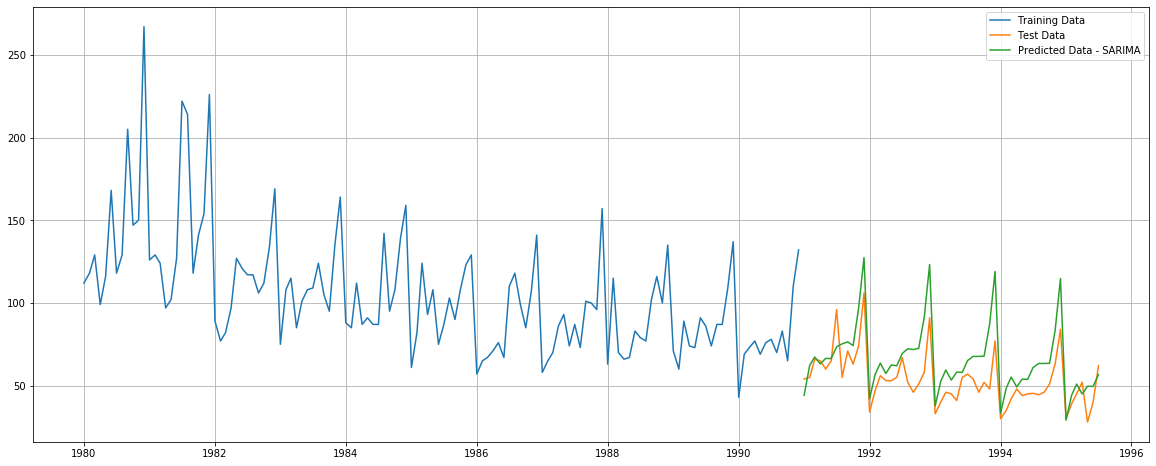

In [594]:
plt.plot(rose_train,label='Training Data')
plt.plot(rose_test,label='Test Data')
#plt.plot(rose_test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(rose_test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

## PACF and ACF

In [518]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

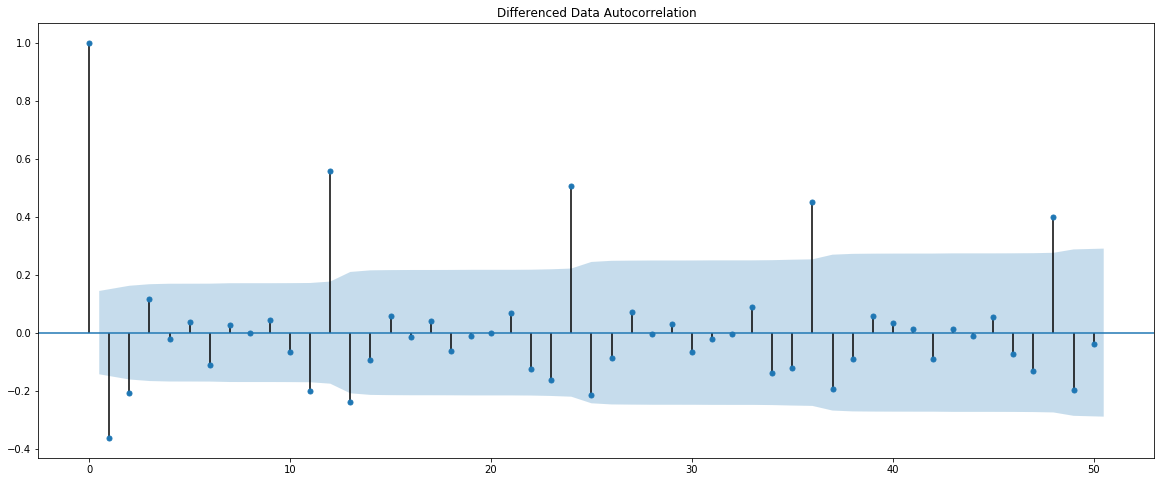

In [520]:
#plot_acf(rose['Rose'],lags=30)
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

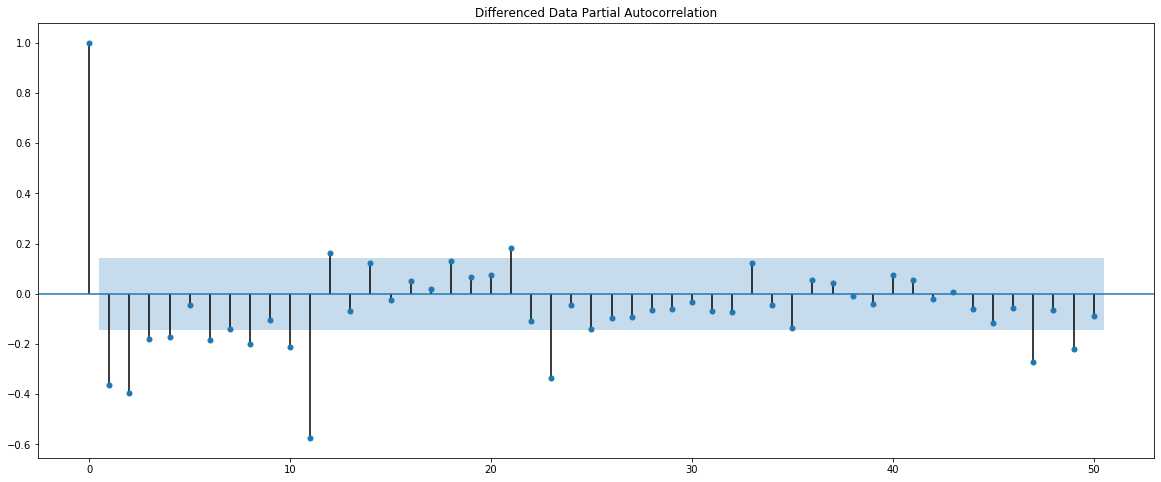

In [567]:
#plot_pacf(rose['Rose'],lags=10)
plot_pacf(rose['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

 p =4 , d= 1 ,q = 2 building ARIMA and SARIMA models on these values of p,d, and q

In [530]:
mod_acf = ARIMA(rose_train['Rose'], order=(4,1,2))

results_Arima_rose_acf = mod_acf.fit()

print(results_Arima_rose_acf.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Wed, 27 Jan 2021   AIC                           1283.753
Time:                        13:05:23   BIC                           1306.754
Sample:                    02-01-1980   HQIC                          1293.099
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

In [531]:
pred_ARIMA_acf = results_Arima_rose_acf.forecast(steps=len(rose_test))
pred_ARIMA_acf[0]

array([87.12778993, 80.92960557, 83.68728171, 75.85052216, 74.51285315,
       77.59082485, 79.55315468, 82.20422225, 85.42906173, 87.8885151 ,
       89.62546323, 90.74384355, 91.12701727, 90.90789999, 90.29308708,
       89.43185064, 88.47565669, 87.55703845, 86.75857915, 86.12441431,
       85.66754605, 85.37324423, 85.20945751, 85.13656215, 85.11404653,
       85.10602292, 85.08477643, 85.03201691, 84.93861127, 84.80325533,
       84.63045892, 84.4283361 , 84.2065541 , 83.97464574, 83.74080715,
       83.51120567, 83.2897433 , 83.07817965, 82.87649928, 82.68340747,
       82.49685408, 82.31450995, 82.13414701, 81.95389954, 81.77240569,
       81.58884428, 81.402891  , 81.21462242, 81.02439452, 80.83271874,
       80.64015233, 80.44721325, 80.25432379, 80.06178235, 79.86975916])

In [533]:
results_f3=pd.DataFrame( { 'Test RMSE' : [mean_squared_error(pred_ARIMA_acf[0], rose_test, squared= False)] } , index= ['ARIMA (4, 1, 2)ACF, PACF '])

In [595]:
results_f3

,Test RMSE
"ARIMA (4, 1, 2)ACF, PACF",33.972477


In [535]:
results_final_rose = pd.concat([results_f3, results_final_rose])

In [536]:
results_final_rose

,Test RMSE
"ARIMA (4, 1, 2)ACF, PACF",33.972477
TES Additive,16.475042
DES,70.599377
TES Multiplicative,25.210414
Regression,22.573067
Naive Model,79.741326
Simple Average Model,53.483727
2 point Moving Average,11.529811
4 point Moving Average,14.457115
6 point Moving Average,14.571789


In [538]:
mod_rose_acf = sm.tsa.statespace.SARIMAX(rose_train['Rose'],
                                order=(4,1,2),
                                seasonal_order=(4,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_s_rose_acf = mod_rose_acf.fit()
print(results_s_rose_acf.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -277.661
Date:                            Wed, 27 Jan 2021   AIC                            581.322
Time:                                    13:28:19   BIC                            609.983
Sample:                                01-01-1980   HQIC                           592.663
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9746      0.199     -4.901      0.000      -1.364      -0.585
ar.L2         -0.1126      0.285   

In [553]:
pred_SARIMA_acf = results_s_rose_acf.get_forecast(steps=len(rose_test))
pred_SARIMA_acf.predicted_mean.head()

1991-01-01    46.371053
1991-02-01    62.930657
1991-03-01    63.526980
1991-04-01    66.465092
1991-05-01    63.538684
Freq: MS, dtype: float64

In [554]:
results_f4=pd.DataFrame( { 'Test RMSE' : [mean_squared_error(pred_SARIMA_acf.predicted_mean, rose_test, squared= False)] } , index= ['SARIMA (4, 1, 2)X(4,1,2) 12,ACF, PACF '])

In [555]:
results_f4

,Test RMSE
"SARIMA (4, 1, 2)X(4,1,2) 12,ACF, PACF",17.534342


In [558]:
results_final_rose = pd.concat( [results_final_rose , results_f1, results_f2, results_f4])

In [565]:
results_final_rose.sort_values(by = 'Test RMSE' , ascending= True)

,Test RMSE
2 point Moving Average,11.529811
4 point Moving Average,14.457115
6 point Moving Average,14.571789
9 point Moving Average,14.731914
"ARIMA( 0,1,2)",15.625788
TES Additive,16.475042
"SARIMA (0, 1, 2)x(2, 1, 2, 12)",16.523415
"SARIMA (4, 1, 2)X(4,1,2) 12,ACF, PACF",17.534342
Regression,22.573067
TES Multiplicative,25.210414


In [597]:
model = ARIMA(rose['Rose'], order=(0,1,2))

final_results = model.fit()

print(final_results.summary())


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  186
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -876.963
Method:                       css-mle   S.D. of innovations             26.650
Date:                Wed, 27 Jan 2021   AIC                           1761.927
Time:                        16:27:24   BIC                           1774.830
Sample:                    02-01-1980   HQIC                          1767.156
                         - 07-01-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5231      0.043    -12.030      0.000      -0.608      -0.438
ma.L1.D.Rose    -0.7923      0.082     -9.617      0.000      -0.954      -0.631
ma.L2.D.Rose    -0.2076      0.081     -2.57

In [620]:
final_results.fittedvalues

YearMonth
1980-02-01    -0.523069
1980-03-01    -2.974006
1980-04-01    -8.206977
1980-05-01     9.711190
1980-06-01    -1.447798
                ...    
1995-03-01     4.190613
1995-04-01    -1.893053
1995-05-01    -7.894959
1995-06-01    10.314427
1995-07-01     1.476447
Length: 186, dtype: float64

In [621]:
rose['Rose']


YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
              ...  
1995-03-01     45.0
1995-04-01     52.0
1995-05-01     28.0
1995-06-01     40.0
1995-07-01     62.0
Name: Rose, Length: 187, dtype: float64

In [626]:
#rose_final= rose.drop('year', axis = 1)
#rose_f=rose_final [rose_final['Rose'].index >= '1980-02-01']

In [634]:
final_pred = final_results.forecast(steps=12)
final_pred[0]


array([44.86625574, 40.08189431, 39.558825  , 39.03575569, 38.51268638,
       37.98961708, 37.46654777, 36.94347846, 36.42040915, 35.89733985,
       35.37427054, 34.85120123])

In [640]:
final_pred_rose = pd.Series(final_pred)

In [633]:
rmse = mean_squared_error(rose_f['Rose'],final_results.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 101.48430399390911


In [693]:
index = pd.date_range(start='1995-08-01',end='1996-08-01', freq = 'M')

pandas.core.indexes.datetimes.DatetimeIndex

In [698]:
dates=pd.DataFrame( index)

In [702]:
final_pred_rose=pd.DataFrame( final_pred_rose)

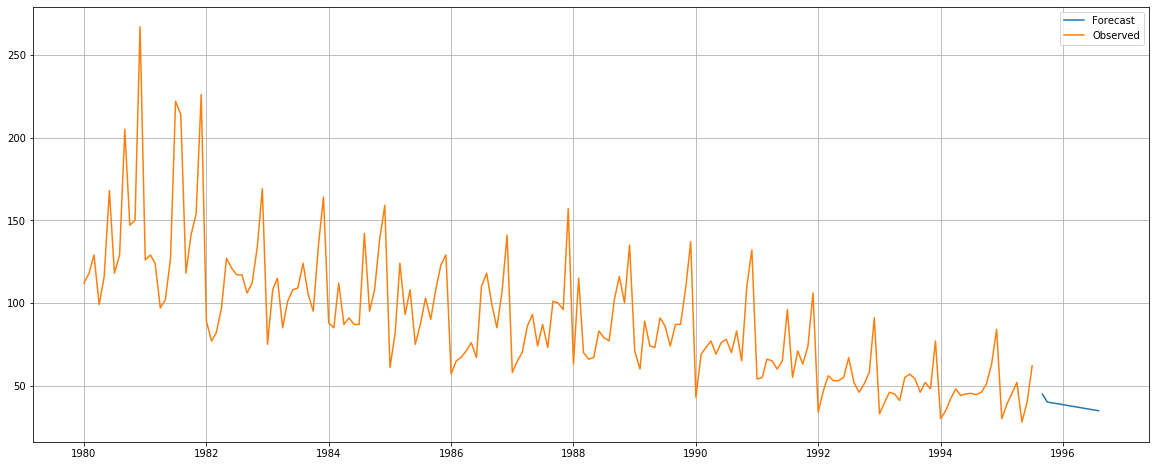

In [714]:
plt.plot(dates,final_pred_rose, label = 'Forecast')
plt.plot(rose['Rose'], label = 'Observed')
axis.set_xlabel('Year-Months')
axis.set_ylabel('RoseWineSales')
plt.legend(loc='best')
plt.grid();
plt.show()